In [1]:
# Shape of the inputs of the deep network.
images_shape = (256, 256, 1)

# Variables defining the path to the dataset.
train_input_path = '../Dataset/train/input/'
train_output_path = '../Dataset/train/output/'
val_input_path = '../Dataset/validation/input/'
val_output_path = '../Dataset/validation/output/'
test_input_path = '../Dataset/test/input/'
test_output_path = '../Dataset/test/output/'

# Variable defining where model will be stored.
model_save_path = "../Model/"

In [2]:
from utils import get_dataset_from_folders

train_images, train_masks = get_dataset_from_folders(train_input_path, train_output_path, images_shape)
val_images, val_masks = get_dataset_from_folders(val_input_path, val_output_path, images_shape)
test_images, test_masks = get_dataset_from_folders(test_input_path, test_output_path, images_shape)

print(f'Training set contains {len(train_images)} images.')
print(f'Validation set contains {len(val_images)} images.')
print(f'Test set contains {len(test_images)} images.')

Training set contains 606 images.
Validation set contains 96 images.
Test set contains 510 images.


In [3]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import model

# Setting up parameters used for training
number_epochs = 100
batch_size = 2
early_stopping = EarlyStopping(patience=50, verbose=1, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(filepath=model_save_path, save_weights_only=False, monitor='val_accuracy', mode='max', save_best_only=True)

# Building Unet model.
unet = model.unet(images_shape)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 16) 160         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 16) 2320        conv2d[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout)               (None, 256, 256, 16) 0           conv2d_1[0][0]                   
______________________________________________________________________________________________

In [4]:
history = unet.fit(train_images, train_masks, validation_data = (val_images, val_masks), batch_size = batch_size, epochs=number_epochs, callbacks=[early_stopping, model_checkpoint])

Train on 606 samples, validate on 96 samples
Epoch 1/100
602/606 [============================>.] - ETA: 0s - loss: 0.5026 - accuracy: 0.9415WARNING:tensorflow:From C:\Anaconda3\lib\site-packages\tensorflow_core\python\ops\resource_variable_ops.py:1786: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ../Model/assets
606/606 [==============================] - 24s 40ms/sample - loss: 0.4997 - accuracy: 0.9418 - val_loss: 0.0583 - val_accuracy: 0.9777
Epoch 2/100
606/606 [==============================] - 19s 32ms/sample - loss: 0.0636 - accuracy: 0.9750 - val_loss: 0.0500 - val_accuracy: 0.9816
Epoch 3/100
606/606 [==============================] - 19s 32ms/sample - loss: 0.0576 - accuracy: 0.9775 - val_loss: 0.0453 - val_accuracy: 0.9835
Epoch 4/100
606/606 [====

606/606 [==============================] - 16s 27ms/sample - loss: 0.0190 - accuracy: 0.9920 - val_loss: 0.0526 - val_accuracy: 0.9855
Epoch 42/100
606/606 [==============================] - 16s 27ms/sample - loss: 0.0190 - accuracy: 0.9920 - val_loss: 0.0574 - val_accuracy: 0.9856
Epoch 43/100
606/606 [==============================] - 16s 27ms/sample - loss: 0.0194 - accuracy: 0.9919 - val_loss: 0.0511 - val_accuracy: 0.9858
Epoch 44/100
606/606 [==============================] - 16s 27ms/sample - loss: 0.0191 - accuracy: 0.9920 - val_loss: 0.0451 - val_accuracy: 0.9855
Epoch 45/100
606/606 [==============================] - 16s 26ms/sample - loss: 0.0191 - accuracy: 0.9920 - val_loss: 0.0513 - val_accuracy: 0.9854
Epoch 46/100
606/606 [==============================] - 16s 27ms/sample - loss: 0.0192 - accuracy: 0.9920 - val_loss: 0.0536 - val_accuracy: 0.9858
Epoch 47/100
606/606 [==============================] - 16s 27ms/sample - loss: 0.0194 - accuracy: 0.9920 - val_loss: 0.0441 

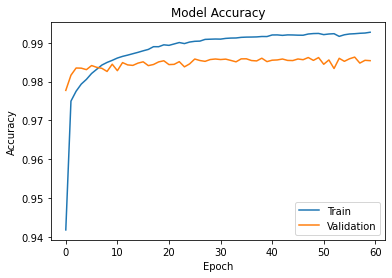

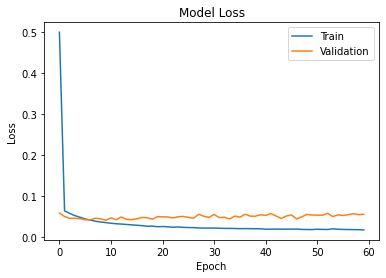

In [5]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()
    
plot_history(history)

In [6]:
unet.evaluate(test_images, test_masks);

510/510 [==============================] - 6s 11ms/sample - loss: 0.0291 - accuracy: 0.9891
